# 모두 카페 꼼꼼히 둘러보기

## 1. 문제 정의 

스터디 카페의 매출 현황과 매출을 더 올리기 위한 방향 제시하기


1) 월별 매출액 추세 : 음식/음료 판매매출, 이용권 판매매출

2) 가장 인기있는 음식/음료

3) 가장 많이 팔린 입장권 종류

## 2. 데이터셋

### 2-1. 데이터 불러오기

In [1]:
# 필요 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [2]:
# 데이터 호출
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

In [3]:
### 2-2. 데이터 확인하기

In [4]:
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [5]:
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [6]:
item_data.head(10)

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"
5,6,디저트,치즈케이크,"4,000원"
6,7,디저트,블루베리머핀,"3,500원"
7,8,디저트,쿠키(오트밀),"1,500원"
8,9,디저트,크로플,"5,500원"
9,10,디저트,치즈케이크,"1,500원"


In [7]:
item_entry_data.head(10)

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"
5,6,한국대생,한국대생 요금제,"1,500원"
6,7,18시이후,거리두기4단계,"1,000원"
7,8,심야-조조,심야-조조 요금제,"2,500원"
8,9,일반인,일반요금제,"3,000원"
9,10,일반인,일반요금제,"7,000원"


In [8]:
entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   object
 7   고객      6300 non-null   object
dtypes: int64(1), object(7)
memory usage: 444.2+ KB


In [10]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      174 non-null    int64 
 1   분류      174 non-null    object
 2   상품명     174 non-null    object
 3   판매금액    174 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.6+ KB


In [11]:
item_entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      34 non-null     int64 
 1   분류      34 non-null     object
 2   상품명     34 non-null     object
 3   판매금액    34 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


## 3. 데이터 분석 : 월별 매출액 추세

### 3-1. 데이터 전처리


1) 음식/음료 판매 매출

2) 이용권 판매 매출




---

LMS 상에서는 음식/음료의 판매 매출로만 월 매출액을 파악했으나 이용권 판매매출도 집계해보았다.

In [12]:
#1. 음식/음료 판매 매출
sales_data.isnull().sum()

결제일시      0
판매위치      0
상품명       0
결제방식      0
비고        0
판매수량      0
결제금액      0
고객      805
dtype: int64

In [13]:
a= sales_data.isnull().value_counts()
pd.DataFrame(a)

0
결제일시  판매위치  상품명   결제방식  비고    판매수량  결제금액  고객         
False False False False False False False False  6300
                                          True    805

- sales_data의 결측치를 확인한 결과 고객이 NaN처리 되어있는 것이 전체의 10%

- 판매 수량과 금액의 손실을 방지하기 위해 1번 데이터 분석에서는 해당 행을 지우지 않고 데이터를 처리하기로 한다.

In [14]:
sales_data['판매수량'].value_counts()

 1    6945
-1     160
Name: 판매수량, dtype: int64

- 판매 취소를 한 데이터는 판매를 했던 데이터와 함께 삭제를 해 줘야 오차가 없는 데이터를 만들 수 있다.

- 하지만 첫 번째 데이터에서는 매출을 확인하기 위한 것으로 데이터를 따로 처리하지 않아도 +,- 되어 데이터에 오차가 생기지 않으므로 이번 항목에서는 따로 처리하지 않도록 한다.

In [15]:
#2. 이용권 판매 매출
entry_data.isnull().sum()

요금제명    263
입실        0
퇴실        0
이용       22
위치        0
금액        0
구분        0
고객        0
dtype: int64

In [16]:
b = entry_data.isnull().value_counts()
pd.DataFrame(b)

,,,,,,,,0
요금제명,입실,퇴실,이용,위치,금액,구분,고객,
False,False,False,False,False,False,False,False,22271
True,False,False,False,False,False,False,False,262
False,False,False,True,False,False,False,False,21
True,False,False,True,False,False,False,False,1


- 요금제명과 이용 항목은 월별 이용권 판매 매출에 영향을 주지 않는 데이터 이므로 따로 처리하지 않은 상태로 매출 데이터를 분석하기로 한다.
- 요금제명이 없이 판매가 되었다는 게 의문스럽지만 판매가 되어 매출로 집계되므로 포함하도록 한다.

- 입장권 구매는 판매 취소에 대한 데이터가 없는 것이 의문스럽다.

### 3-2. 데이터 분석하기

In [17]:
#1. 음식/음료 판매매출
# 활용할 데이터(sales_data)를 s_data로 정의하기
s_data = sales_data.copy()

# s_data의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
s_data['date'] = sales_data['결제일시'].str[:7]
s_data

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


- 데이터를 살펴보면 2021.2월과 2022.4월은 한달 매출 집계가 아니므로 데이터에서 제외시켜도 될 것 같다

In [18]:
s_data = s_data[s_data['date'] != '2022-04']

In [19]:
s_data = s_data[s_data['date'] != '2021-02']
s_data.reset_index(drop=True)

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-03-31 20:54,선불기1,김치볶음밥,신용카드,결제완료,1,"5,900",customer264394,2022-03
1,2022-03-31 15:36,선불기1,쿠앤크쉐이크,신용카드,결제완료,1,"5,900",customer490619,2022-03
2,2022-03-31 15:36,선불기1,치즈케이크,신용카드,결제완료,1,"4,000",customer490619,2022-03
3,2022-03-31 14:51,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer751113,2022-03
4,2022-03-31 12:52,선불기1,만두라면,신용카드,결제완료,1,"5,000",customer897964,2022-03
...,...,...,...,...,...,...,...,...,...
7070,2021-03-01 16:21,선불기1,계란추가,신용카드,결제완료,1,500,customer402576,2021-03
7071,2021-03-01 16:21,선불기1,계란추가,신용카드,결제완료,1,500,customer402576,2021-03
7072,2021-03-01 16:21,선불기1,치즈추가,신용카드,결제완료,1,500,customer402576,2021-03
7073,2021-03-01 16:21,선불기1,낙지볶음밥,신용카드,결제완료,1,"5,500",customer402576,2021-03


In [20]:
# sales_data의 결제금액에 포함된 쉼표(,) 지우기
sales_data['결제금액'] = sales_data['결제금액'].str.replace(',','')

In [21]:
# sales_data의 결제금액을 숫자형태로 바꾸기
s_data['결제금액'] = sales_data['결제금액'].astype(int)

# s_data의 payment열을 date 기준으로 집계하기
payment_data = s_data['결제금액'].groupby(s_data['date']).sum()

In [22]:
payment_data

date
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
Name: 결제금액, dtype: int64

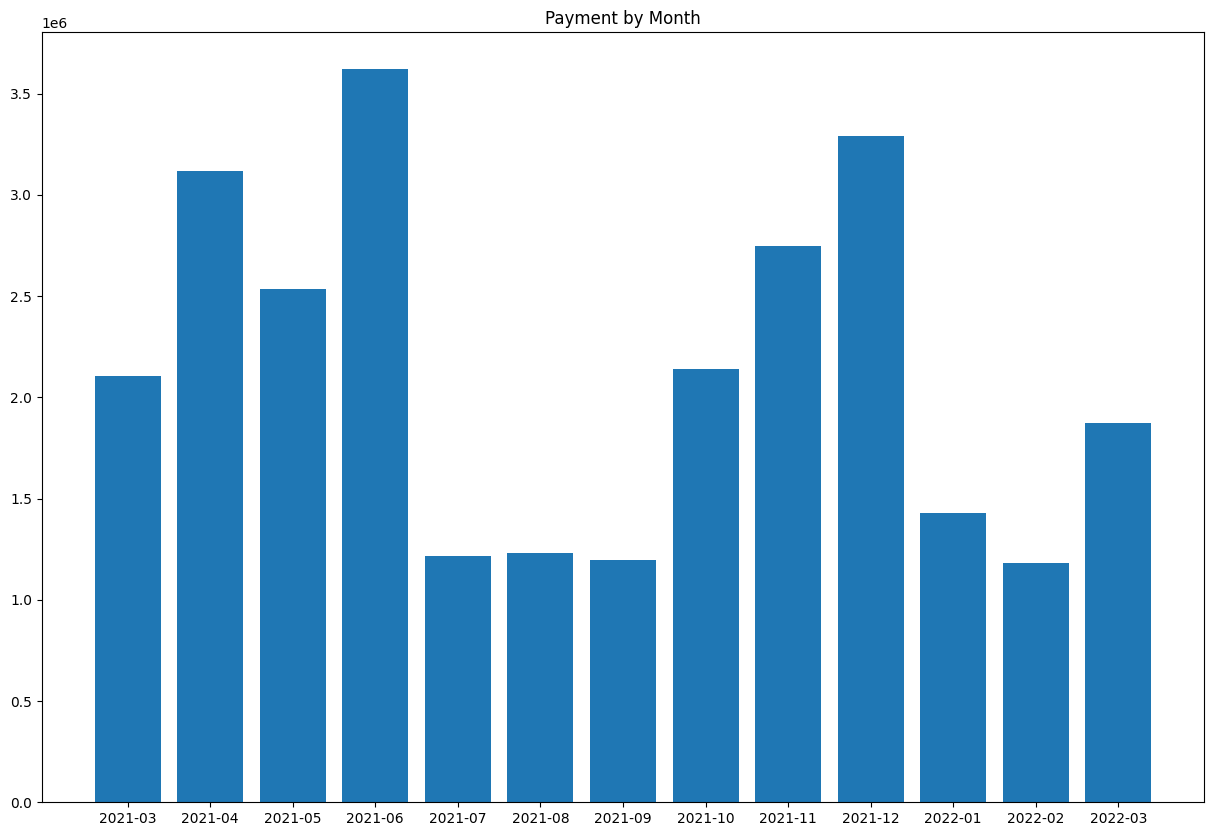

In [23]:
# 집계 결과를 시각화하기

payment_data
plt.figure(figsize=(15,10))
plt.bar(payment_data.index, payment_data)
plt.title('Payment by Month')
plt.show()

3월\~6월, 10월\~12월에 매출이 많고
7\~9월, 1\~2월에는 매출이 감소한 것을 알 수 있다.

In [24]:
#2. 이용권 판매매출
# 활용할 데이터 새로 정의하기
e_data = entry_data.copy()

# e_data의 date열을 만들고, entry_data의 입실 중 7번째 값까지 할당
e_data['date'] = entry_data['입실'].str[:7]
e_data

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,date
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,2022-04
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717,2022-04
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,2022-04
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263,2022-04
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928,2022-04
...,...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105,2021-02
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105,2021-02
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105,2021-02
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105,2021-02


- 이번에도 2021.2월과 2022.4월의 데이터는 삭제하도록 한다.

In [25]:
e_data = e_data[e_data['date'] != '2022-04']

In [26]:
e_data = e_data[e_data['date'] != '2021-02']
e_data.reset_index(drop=True)

,요금제명,입실,퇴실,이용,위치,금액,구분,고객,date
0,심야-조조무제한,2022-03-31 22:35,2022-04-01 6:06,오전 7:31:00,선불기2,6000,퇴실,customer847542,2022-03
1,심야-조조무제한,2022-03-31 22:01,2022-04-01 0:33,오전 2:32:00,선불기1,6000,퇴실,customer874765,2022-03
2,한국대생 무제한 입장권,2022-03-31 20:41,2022-04-01 1:45,오전 5:04:00,선불기2,6400,퇴실,customer761560,2022-03
3,한국대생 무제한 입장권,2022-03-31 20:41,2022-04-01 1:45,오전 5:04:00,선불기2,6400,퇴실,customer761560,2022-03
4,한국대생 무제한 입장권,2022-03-31 19:10,2022-04-01 1:15,오전 6:05:00,선불기2,6900,퇴실,customer851838,2022-03
...,...,...,...,...,...,...,...,...,...
22443,입장권(종일권),2021-03-01 13:57,2021-03-01 17:49,오전 3:52:00,선불기2,7000,퇴실,customer633018,2021-03
22444,한국대생 입장권(종일권),2021-03-01 13:42,2021-03-01 18:10,오전 4:28:00,선불기2,5500,퇴실,customer830841,2021-03
22445,기간권,2021-03-01 13:32,2021-03-01 13:32,오전 12:00:00,선불기1,0,퇴실,customer520863,2021-03
22446,한국대생 입장권(종일권),2021-03-01 13:14,2021-03-01 13:21,오전 12:06:00,선불기1,5500,퇴실,customer520863,2021-03


In [27]:
# e_data의 payment열을 date 기준으로 집계하기
payment_data = e_data['금액'].groupby(s_data['date']).sum()
payment_data

date
2021-03    2921500
2021-04    4973500
2021-05    3821000
2021-06    5384000
2021-07    1803000
2021-08    1589500
2021-09    1550500
2021-10    2880000
2021-11    3745500
2021-12    4840100
2022-01    2495300
2022-02    1789600
2022-03    2308000
Name: 금액, dtype: int64

- s_data와 달리 e_data는 금액이 int형으로 되어있고 ','가 표시되어 있지 않으므로 별도 처리를 해주지 않아도 된다.

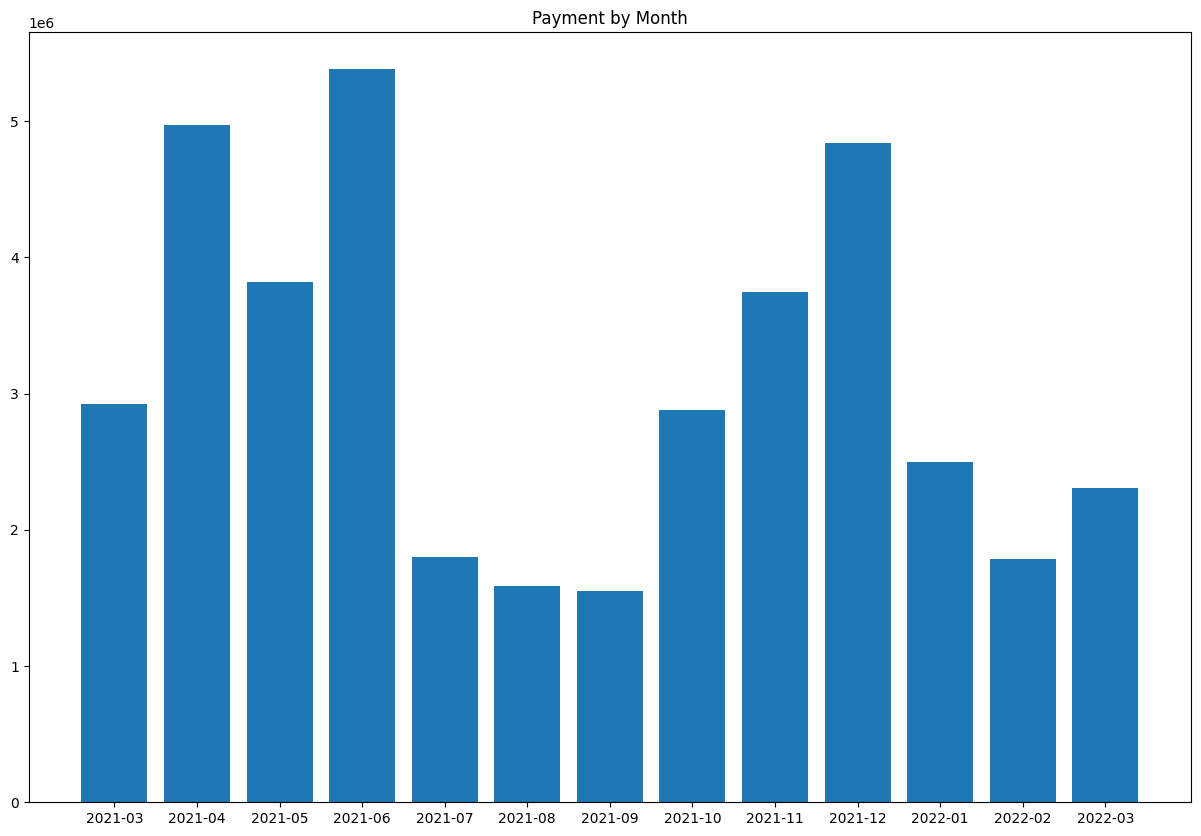

In [28]:
# 집계 결과를 시각화하기

payment_data
plt.figure(figsize=(15,10))
plt.bar(payment_data.index, payment_data)
plt.title('Payment by Month')
plt.show()

음식 판매 매출과 같이 3\~6월, 10\~12월에 매출이 높고

7\~9월, 1\~2월 매출이 감소한 것을 알 수 있다.

In [29]:
## 4. 데이터 분석 : 가장 인기있는 음식/음료

### 4-1. 데이터 전처리

In [30]:
sales_data['판매수량'].value_counts()

 1    6945
-1     160
Name: 판매수량, dtype: int64

- 3번의 월별 매출액에서는 금액의 오차를 방지하기 위해 판매수량을 따로 처리하지 않았다

- 이번에는 가장 인기있는 메뉴를 카운트해야 하기 때문에 판매취소된 수만큼 데이터를 없애준다.

In [31]:
# 새롭게 변수로 정의하기
s_data_1 = sales_data.copy()

- 이번에는 가장 인기있는 품목을 알기 위한 것이기 때문에 22-04와 21-02의 데이터를 포함해서 집계를 하도록 한다.

- 그러기 위해 새로운 변수로 지정을 해줬다.

In [32]:
s_data_1 = s_data_1[s_data_1['판매수량'] != -1]

In [33]:
items_count = s_data_1['상품명'].value_counts()

In [34]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = pd.DataFrame(items_count)
items_count = items_count.head(10)
items_count

,상품명
김치볶음밥,1204
라면,749
짜장라면,455
치즈불고기볶음밥,420
계란추가,314
낙지볶음밥,312
새우볶음밥,309
아메리카노(ICE),284
치즈감자튀김,246
감자튀김,242


### 4-2. 데이터 분석하기

In [35]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


<Figure size 1500x1000 with 0 Axes>

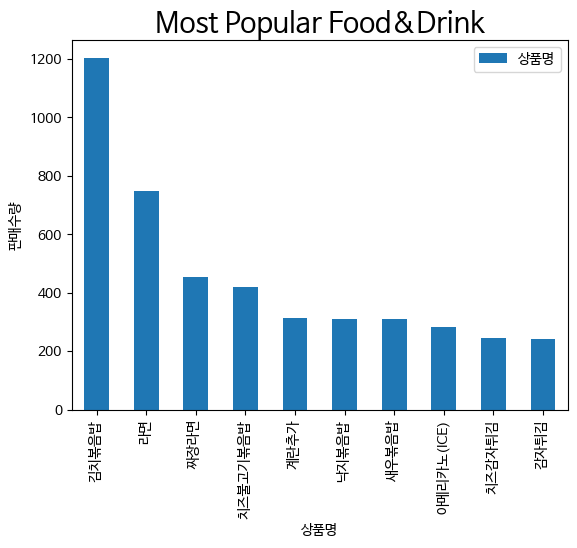

In [36]:
# 집계 결과를 시각화하기
plt.figure(figsize=(15,10)) 
items_count.plot(kind = 'bar') 
plt.title('Most Popular Food&Drink',fontsize = 20)
plt.xlabel('상품명',fontsize =10)
plt.ylabel('판매수량',fontsize =10)
plt.show()

In [37]:
# s_data_1의 결제금액을 숫자형태로 바꾸기
s_data_1['결제금액'] = sales_data['결제금액'].astype(int)

# s_data_1의 payment열을 상품명을 기준으로 집계하기
item_payment = s_data_1['결제금액'].groupby(s_data_1['상품명']).sum()

# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = item_payment.sort_values(ascending=False).head(10)
items_payment

상품명
김치볶음밥         6004400
라면            2941500
치즈불고기볶음밥      2292600
짜장라면          2038500
낙지볶음밥         1710700
새우볶음밥         1539800
치즈감자튀김        1354200
감자튀김          1083800
아메리카노(ICE)    1058100
불닭볶음면          693000
Name: 결제금액, dtype: int64

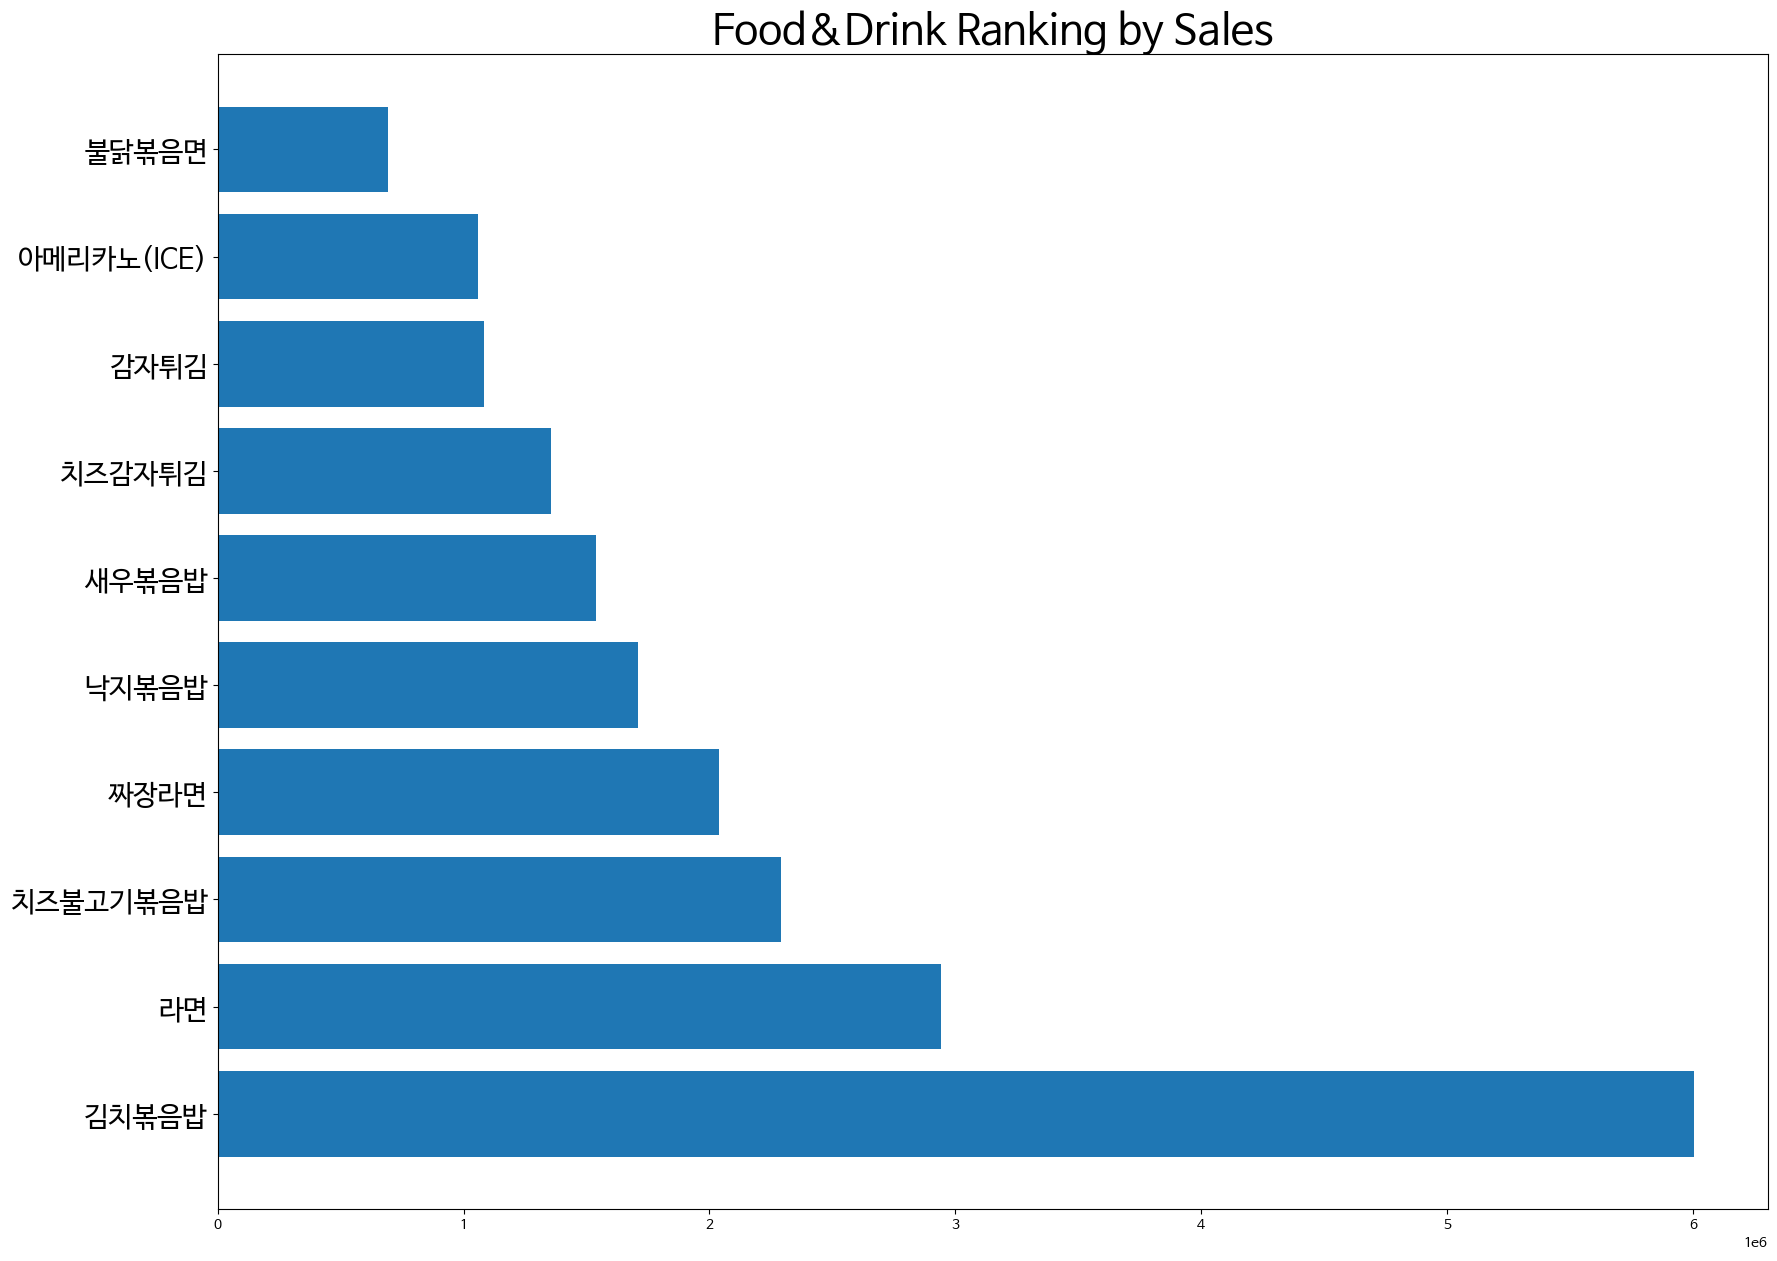

In [38]:
# 집계 결과 시각화하기
plt.figure(figsize=(20,15))
plt.yticks(fontsize=20)
plt.barh(items_payment.index, items_payment)
plt.title('Food&Drink Ranking by Sales', fontsize=30)
plt.show()

- 품목명이 길어 보기 편하도록 x축과 y축을 바꿔 시각화하였다.

가장 인기있는 품목 상위 10개를 시각화 해 보았다.

- 김치볶음밥이 가장 많은 판매율을 가진다는 것을 알 수 있고, 주로 식사류가 상위 품목이라는 것을 알 수 있다.

- 상위 10개 중에서 음료는 아메리카노가 유일하다.

## 5. 데이터 분석 : 가장 많이 팔린 입장권 종류
### 5-1. 데이터 전처리

In [39]:
entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [40]:
entry_data.isnull().sum()

요금제명    263
입실        0
퇴실        0
이용       22
위치        0
금액        0
구분        0
고객        0
dtype: int64

In [41]:
# 결측치가 서로 중첩되는 지 확인
b = entry_data.isnull().value_counts()
pd.DataFrame(b)

,,,,,,,,0
요금제명,입실,퇴실,이용,위치,금액,구분,고객,
False,False,False,False,False,False,False,False,22271
True,False,False,False,False,False,False,False,262
False,False,False,True,False,False,False,False,21
True,False,False,True,False,False,False,False,1


- 이용권을 구매하였으나 이용하지 않은 경우는 스터디카페의 매출에 영향을 주지 못하므로 무시하기로 한다.

- 요금제명이 없는데 결제된 내역이 있는 것은 이용권의 판매도를 파악하기 위해서는 제거하도록 한다.

In [42]:
e_data = entry_data.copy()
e_data = e_data.dropna(subset=['요금제명'])
e_data

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


- 총 22555개의 데이터 중 요금제명에 해당하는 결측지 263개가 지워진 것을 확인할 수 있다.

### 5-2. 데이터 분석하기

In [43]:
# e_data의 금액을 숫자형태로 변환하기
e_data['금액'] = e_data['금액'].astype(int)

# e_data의 금액을 요금제명을 기준으로 집계하기
tickets_t10 = e_data['금액'].groupby(e_data['요금제명']).sum()

# tickets_t10의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets_t10 = tickets_t10.sort_values(ascending=False).head(10)
tickets_t10

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int64

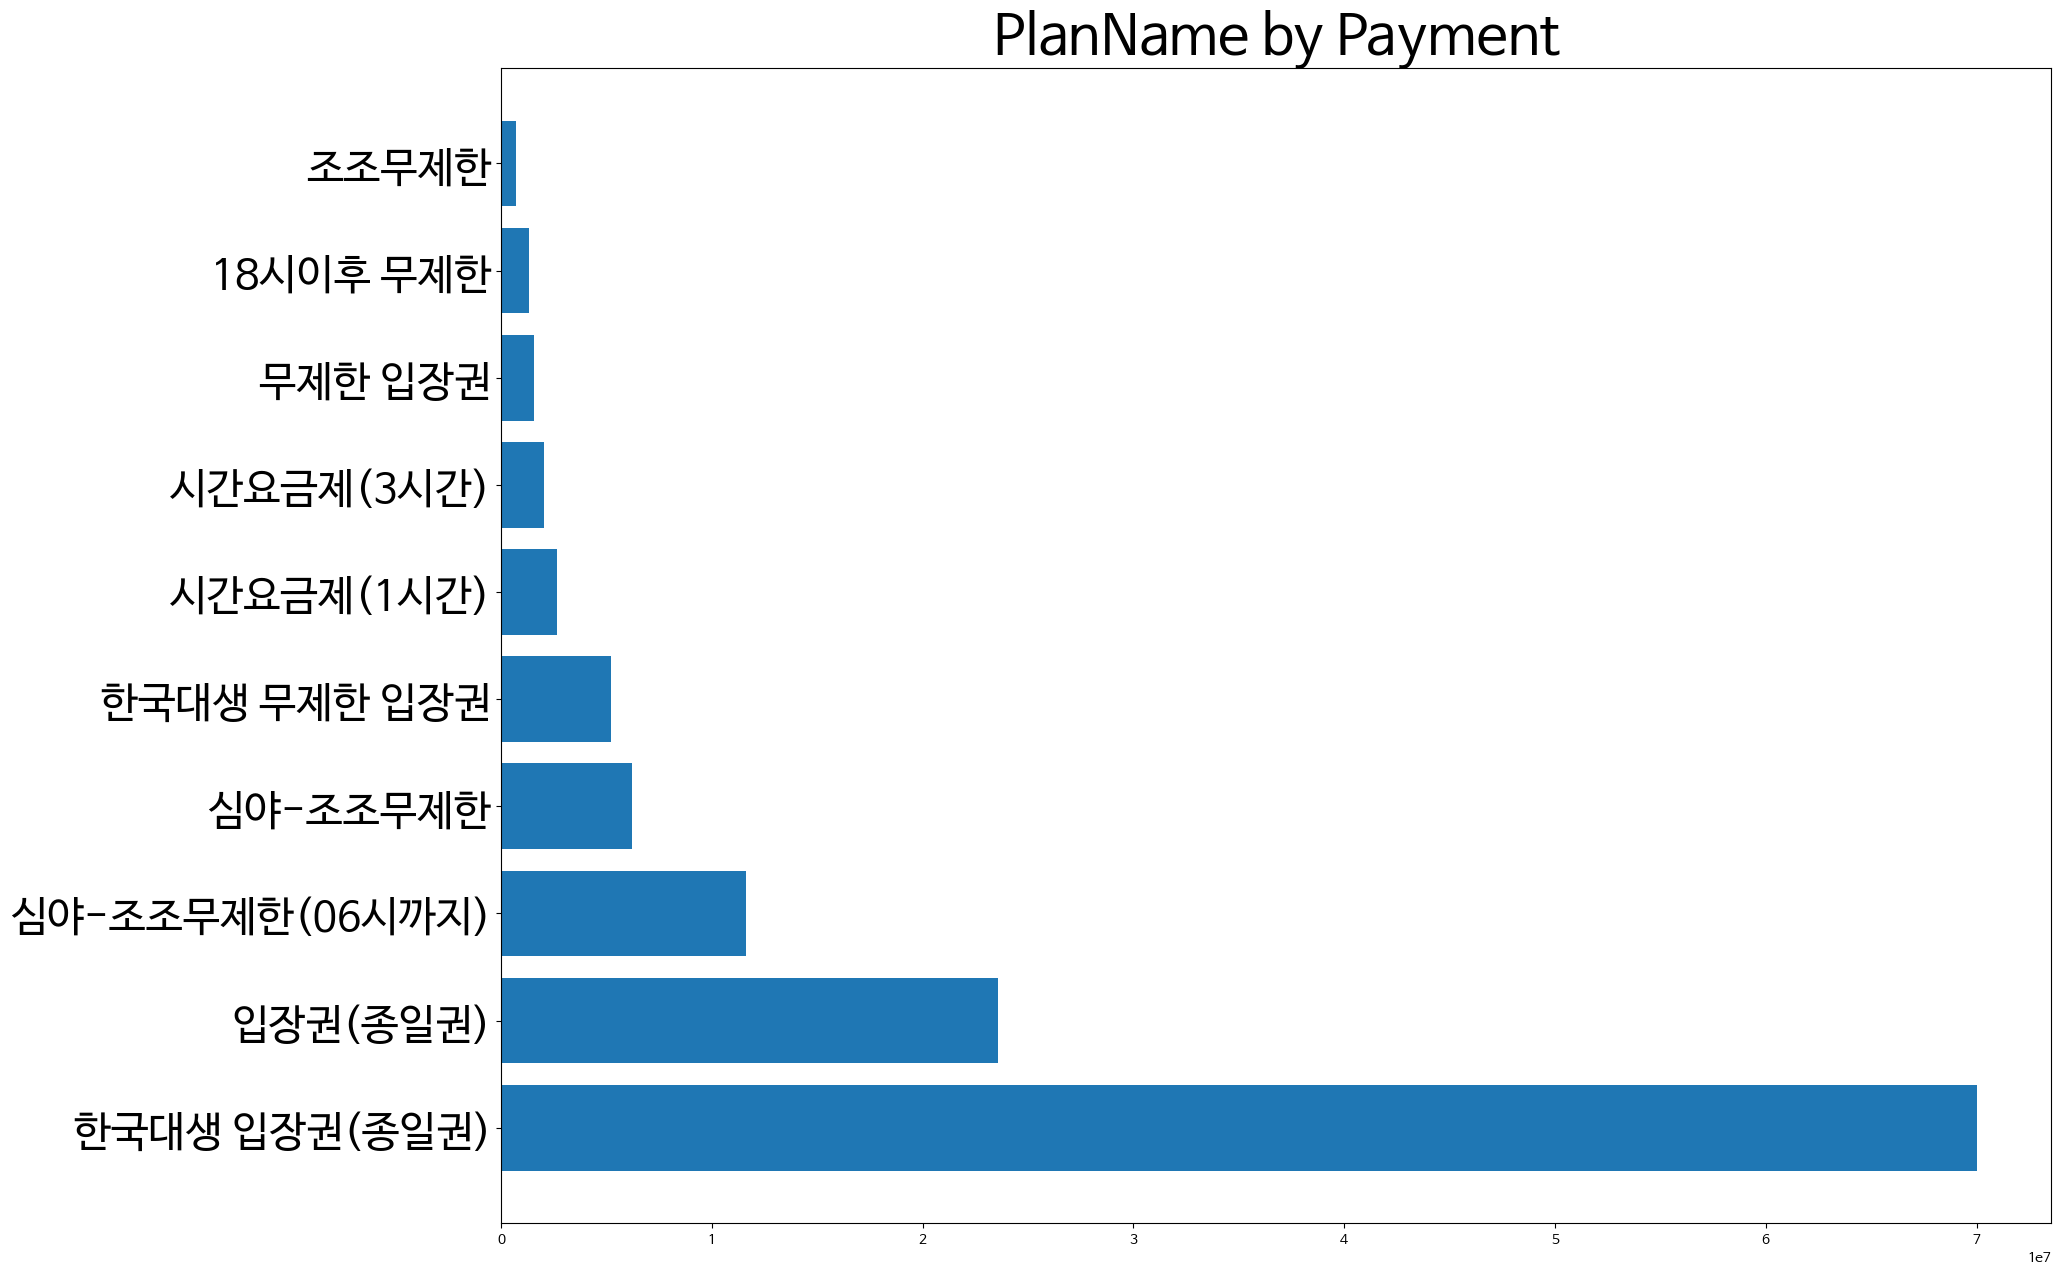

In [44]:
# 집계 결과 시각화하기
plt.figure(figsize=(20,15))
plt.yticks(fontsize=30)
plt.barh(tickets_t10.index, tickets_t10)
plt.title('PlanName by Payment', fontsize=40)
plt.show()

- 한국대생 입장권(종일권)이 압도적으로 많은 수를 차지한다는 것을 알 수 있다.

- 그 다음으로 종일권이 많은 수를 차지하는 것을 보아 한국대생이 아닌 사람들도 종일권을 많이 이용한다는 것을 알 수 있다.

## 6. 데이터 분석으로 알게 된 것

1. 스터디카페 '모두카페'는 3\~6월과 10\~12월에 매출이 많고, 7\~9월, 1\~2월에는 매출이 적게 나온다

2. 주로 음식 판매가 식사류에 몰려있다.

3. 한국대생 입장권의 비율이 압도적인 것으로 보아 한국대 근처에 위치한다는 것을 알 수 있다.

4. 입장권의 판매 취소에 대한 내역은 없는 것으로 보아 입장권은 구매하면 반드시 사용하거나 환불하지 못한다는 것을 알 수 있다.

5. 한국대생이 아닌 사람들도 종일권을 가장 선호한다는 것을 알 수 있다.

## 7. 모두 카페에 제안할 내용

1. 주로 식사류의 상품이 잘 팔리므로 마진이 좋은 음료를 잘 나가는 식사류 top5개와 묶어서 세트 판매

2. 디저트류가 잘 안나가므로 상위 판매 품목인 아메리카노(ice)와 디저트류를 묶어 세트 판매

3. 비수기인 1\~2월과 7\~9월에 입장권 가격을 할인 판매하는 것

4. 또는 비수기에 입장권에 음료를 붙여서 주는 것도 괜찮을 것 같다 (아메리카노 : 마진이 많이 남고 인기가 가장 많음)

## 8. 회고

1. 처음 데이터 분석을 위한 라이브러리를 배울 땐 어렵고 감이 잡히지 않았는데 프로젝트를 진행하면서 데이터 분석을 어떻게 해야 하는 지 알 수 있었다. 

2. 데이터 분석에서 가장 중요한 것은 전처리라는 것을 몸소 체험할 수 있었다. 처음엔 시각화 하는 것 자체에만 집중했었는데 시각화를 할 수 있게 되자 유의미한 결과를 가져오기 위한 것을 결국 전처리가 결정한다는 것을 알 수 있었다.

3. 입장데이터에서 입실과 이용에 대한 정보가 따로 있는데 어떻게 집계되는 것인지 이해가 가지 않았다.

4. 상품 품목을 보면 2인 라면과 같은 품목이 있는데 가격이 매우 저렴하게 되어 있어서 기존 상품에 추가해서 양을 불려주는 형식인지, 그 가격에 특가 상품으로 판매되는 것인지 알 수 없어 아쉬웠다.

5. 상품 판매의 수량을 확인할 때 판매취소가 되어-1이 되는 것은 파악했지만 그에 상응하는 값도 한번 더 지워줘야 했는데 이번 프로젝트에서는 하지 못해 아쉬웠다. 다음에는 같은 데이터에서 더 오차가 생기지 않게 전처리를 하도록 해야할 것 같다.